# 1. Implementación de Decission Tree Regressors con Hyper Parameter Tuning

## 1 Instalamos e Importamos las librerías necesarias

In [42]:
#!pip install sweetviz
#!pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importamos algunas librerías para análisis de datos
import sweetviz as sv

# Librerías para el análisis de Varianze Inflation Factor
##from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import set_config 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignoraremos los Warnings para hacer el cuaderno un poco más amigable al usuario.
import warnings
warnings.filterwarnings("ignore")

# Declaramos algunas variables globales
N_JOBS = 6 # Número de núclos a implementar por gridsearch para el hyper parámeter tuning
CV = 5 # Número de interaciones para hacer cross validation.

# Parámetros de los winners y losers con los que se realizan cálculos y se debn hacer drop.
UNNECESSARY_ATTR = ['tourney_id', 'tourney_name', 'winner_name', 'loser_name', 'winner_entry', 'winner_seed', 'loser_entry', 'loser_seed','tourney_date', 'winner_id', 'loser_id', 'score']
WL_DROP = ['w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms'] 


## 2. Cargamos los datos de los partidos de la ATP desde el 2000 al 2021
> Aquí cargaremos los datos desde el repositorio, centraremos todos los datasets

In [22]:
df_atp_matches_2000 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2000.csv')
df_atp_matches_2001 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2001.csv')
df_atp_matches_2002 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2002.csv')
df_atp_matches_2003 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2003.csv')
df_atp_matches_2004 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2004.csv')
df_atp_matches_2005 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2005.csv')
df_atp_matches_2006 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2006.csv')
df_atp_matches_2007 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2007.csv')
df_atp_matches_2008 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2008.csv')
df_atp_matches_2009 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2009.csv')
df_atp_matches_2010 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2010.csv')
df_atp_matches_2011 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2011.csv')
df_atp_matches_2012 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2012.csv')
df_atp_matches_2013 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2013.csv')
df_atp_matches_2014 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv')
df_atp_matches_2015 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv')
df_atp_matches_2016 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv')
df_atp_matches_2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df_atp_matches_2017 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
df_atp_matches_2018 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
df_atp_matches_2019 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
df_atp_matches_2020 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv')


In [23]:
frame = [df_atp_matches_2000, df_atp_matches_2001, df_atp_matches_2002, df_atp_matches_2003, df_atp_matches_2004, df_atp_matches_2005, df_atp_matches_2006, df_atp_matches_2007, df_atp_matches_2008, df_atp_matches_2009, df_atp_matches_2010, df_atp_matches_2011, df_atp_matches_2012, df_atp_matches_2013, df_atp_matches_2014, df_atp_matches_2015, df_atp_matches_2016, df_atp_matches_2017, df_atp_matches_2017, df_atp_matches_2018, df_atp_matches_2019, df_atp_matches_2020]
df = pd.concat(frame, ignore_index = True) # definimos ignore index false para que 

#print(df.info())
#print(df.head())
# vamos a convertir la columna de fecha a date

print('=================================================================')
print(df.info())
#print(df.head())
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66069 entries, 0 to 66068
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          66069 non-null  object 
 1   tourney_name        66069 non-null  object 
 2   surface             66069 non-null  object 
 3   draw_size           66069 non-null  int64  
 4   tourney_level       66069 non-null  object 
 5   tourney_date        66069 non-null  int64  
 6   match_num           66069 non-null  int64  
 7   winner_id           66069 non-null  int64  
 8   winner_seed         27428 non-null  float64
 9   winner_entry        8114 non-null   object 
 10  winner_name         66069 non-null  object 
 11  winner_hand         66061 non-null  object 
 12  winner_ht           63613 non-null  float64
 13  winner_ioc          66069 non-null  object 
 14  winner_age          66066 non-null  float64
 15  loser_id            66069 non-null  int64  
 16  lose

In [24]:
atp_report = sv.analyze(df)
atp_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Análisis de Correlación y Limpieza de Datos

> Haremos un análisis de correlación de las variables que utilizaremos para la regresión, 
con la regresión intentaremos estimar la **minutes** que es la caracteristica que describe 
el tiempo de duración de un partido. 

> También haremos una limpieza de los datos que necesitamos, eliminaremos algunas variables.

> Del análisis con Sweetviz hemos encontrado que para la variable a predeir **"minutes"** tenemos un outlier con un valor de **1146**.

### 3.1 Imagenes del reporte de Sweetviz

In [25]:
# Vamos a eliminar las variables que son identificadores, nombres etc
# Incluimos en el drop las siguientes variables que tienen muchos registros NaN
# quitaremos las columna de score
df_regression = df


df_regression = df_regression.drop(UNNECESSARY_ATTR, axis = 1) 
df_regression = df_regression.dropna()
df_regression = df_regression.drop_duplicates()

# Crearemos dos formulas para calculos del ganador y el perdedor para evitar la correlación de estas variables, tambien haremos un drop de estas variables.
df_regression['w_calculation'] = df_regression['w_svpt'] + df_regression['w_1stIn'] + df_regression['w_1stWon'] + df_regression['w_2ndWon'] + df_regression['w_SvGms']
df_regression['l_calculation'] = df_regression['l_svpt'] + df_regression['l_1stIn'] + df_regression['l_1stWon'] + df_regression['l_2ndWon'] + df_regression['l_SvGms']

df_regression = df_regression.drop(WL_DROP, axis = 1) 

df_regression = df_regression._get_numeric_data() #drop non-numeric cols

# Eliminamos los outlier para minutes
df_regression = df_regression[df_regression['minutes'] < 400]

atp_report = sv.analyze(df_regression)
atp_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2 Análisis de Outliers

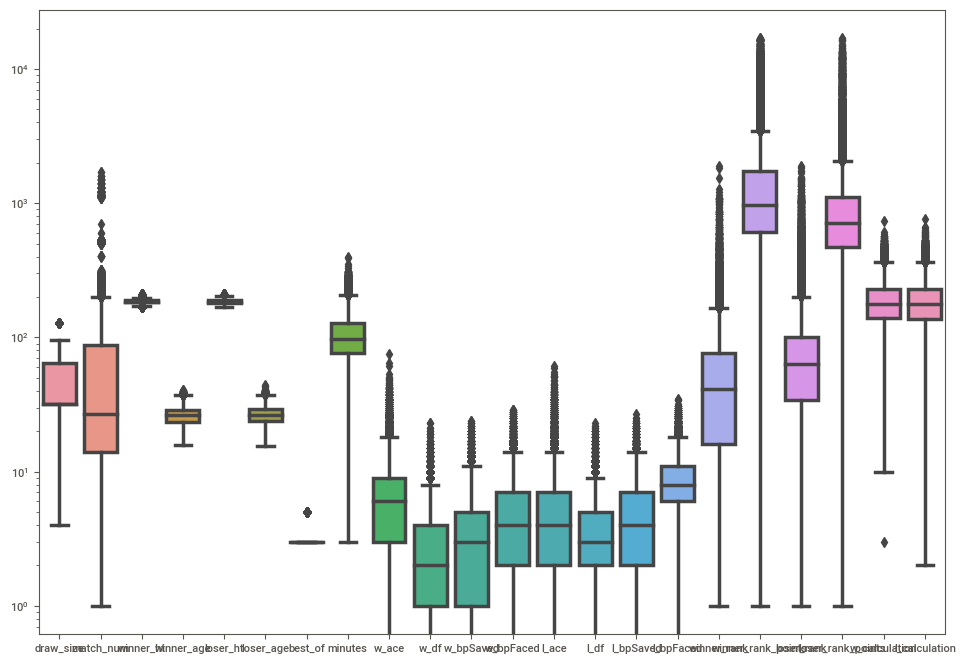

In [26]:
df_scaled = df_regression


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
g = sns.boxplot(data = df_scaled, linewidth = 2.5, ax = ax)
g.set_yscale("log")

## 4. Aplicando Decission Tree Regressor con Hyper Parameter Tuning

> Aplicaremos DTR sobre el conjunto de datos limpio, divideremos previamente el conjunto de datos entre entrenamiento y test.

### 4.1 Utilizando MinMaxScaler en el PipeLine

In [27]:
X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

## Comentaremos este escalado de datos y lo haremos probando el MinMaxScaler, RobustScaler y el StandarScaler
# X = scale(X)
# y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [28]:
set_config(print_changed_only=False) 

dtr_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dtr', DecisionTreeRegressor())])

params = [{'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'dtr__splitter': ['best', 'random'],
         'dtr__max_features': [None],
         'dtr__max_depth': [1, 3, 5, 7],
         'dtr__min_weight_fraction_leaf': [0.0, 0.1, 0,2]}]

gs_dtr = GridSearchCV(dtr_pipe,
                      param_grid = params,
                      scoring = 'explained_variance',
                      n_jobs = N_JOBS,
                      cv = CV)

gs_dtr.fit(X_train, y_train)
print(f'Los parámetros del mejor modelo son: {gs_dtr.best_params_}')

print(f'El score con el conjunto de entrenamiento de los mejores parámetros es: {gs_dtr.score(X_train, y_train)}')
print(f'El score con el conjunto de test de los mejores parámetros es: {gs_dtr.score(X_test, y_test)}')

Los parámetros del mejor modelo son: {'dtr__criterion': 'absolute_error', 'dtr__max_depth': 7, 'dtr__max_features': None, 'dtr__min_weight_fraction_leaf': 0.0, 'dtr__splitter': 'best'}
El score con el conjunto de entrenamiento de los mejores parámetros es: 0.887288166023622
El score con el conjunto de test de los mejores parámetros es: 0.8768954528785907


In [29]:
y_pred = gs_dtr.predict(X_test)#dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

score = gs_dtr.score(X_test, y_test)#dtr.score(X_test, y_test)
print("Score:", score) 

MSE:  199.97094613715686
RMSE:  99.98547306857843
Score: 0.8768954528785907


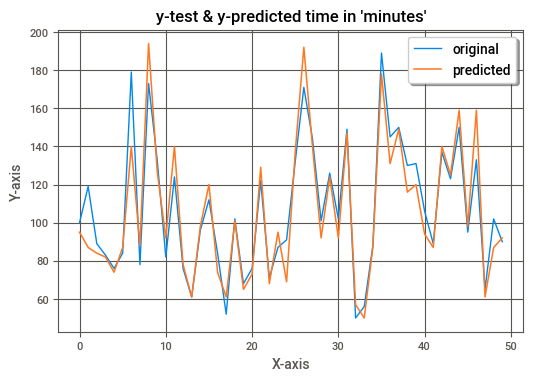

In [30]:
x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], linewidth=1, label="original")
plt.plot(x_ax, y_pred[:50], linewidth=1.1, label="predicted")
plt.title("y-test & y-predicted time in 'minutes'")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### 4.2 Utilizando StandardScaler en el PipeLine

In [31]:
X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

# Comentaremos este escalado de datos y lo haremos probando el MinMaxScaler, RobustScaler y el StandarScaler
#X = scale(X)
#y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
set_config(print_changed_only=False) 

dtr_pipe = Pipeline([('ss', StandardScaler()),
                     ('dtr', DecisionTreeRegressor())])

params = [{'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'dtr__splitter': ['best', 'random'],
         'dtr__max_features': [None],
         'dtr__max_depth': [1, 3, 5, 7],
         'dtr__min_weight_fraction_leaf': [0.0, 0.1, 0,2]}]

gs_dtr = GridSearchCV(dtr_pipe,
                      param_grid = params,
                      scoring = 'explained_variance',
                      n_jobs = N_JOBS,
                      cv = CV)

gs_dtr.fit(X_train, y_train)
print(f'Los parámetros del mejor modelo son: {gs_dtr.best_params_}')

print(f'El score con el conjunto de entrenamiento de los mejores parámetros es: {gs_dtr.score(X_train, y_train)}')
print(f'El score con el conjunto de test de los mejores parámetros es: {gs_dtr.score(X_test, y_test)}')
#==========================================================================
#dtr.fit(X_train, y_train)

#score = dtr.score(X_train, y_train)
#print("R-squared:", score) set_config(print_changed_only=False) 

Los parámetros del mejor modelo son: {'dtr__criterion': 'absolute_error', 'dtr__max_depth': 7, 'dtr__max_features': None, 'dtr__min_weight_fraction_leaf': 0.0, 'dtr__splitter': 'best'}
El score con el conjunto de entrenamiento de los mejores parámetros es: 0.8872150369852596
El score con el conjunto de test de los mejores parámetros es: 0.8772135058073212


In [33]:
y_pred = gs_dtr.predict(X_test)#dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

score = gs_dtr.score(X_test, y_test)#dtr.score(X_test, y_test)
print("Score: ", score) 

MSE:  199.415691915857
RMSE:  99.7078459579285
Score:  0.8772135058073212


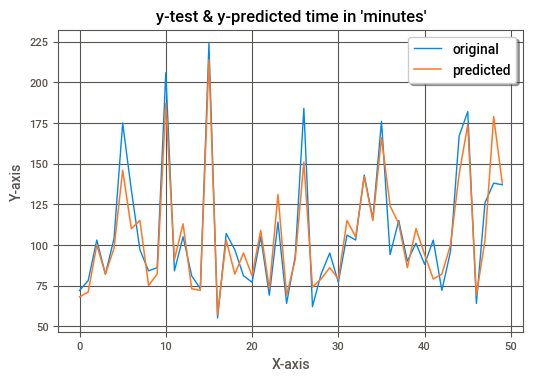

In [34]:
x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], linewidth=1, label="original")
plt.plot(x_ax, y_pred[:50], linewidth=1.1, label="predicted")
plt.title("y-test & y-predicted time in 'minutes'")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### 4.3 Utilizando RobustScaler en el PipeLine

In [35]:
X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

# Comentaremos este escalado de datos y lo haremos probando el MinMaxScaler, RobustScaler y el StandarScaler
#X = scale(X)
#y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
set_config(print_changed_only = False) 

dtr_pipe = Pipeline([('rs', RobustScaler()),
                     ('dtr', DecisionTreeRegressor())])

params = [{'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'dtr__splitter': ['best', 'random'],
         'dtr__max_features': [None],
         'dtr__max_depth': [1, 3, 5, 7],
         'dtr__min_weight_fraction_leaf': [0.0, 0.1, 0,2]}]

gs_dtr = GridSearchCV(dtr_pipe,
                      param_grid = params,
                      scoring = 'explained_variance',
                      n_jobs = N_JOBS,
                      cv = CV)

gs_dtr.fit(X_train, y_train)
print(f'Los parámetros del mejor modelo son: {gs_dtr.best_params_}')

print(f'El score con el conjunto de entrenamiento de los mejores parámetros es: {gs_dtr.score(X_train, y_train)}')
print(f'El score con el conjunto de test de los mejores parámetros es: {gs_dtr.score(X_test, y_test)}')

Los parámetros del mejor modelo son: {'dtr__criterion': 'absolute_error', 'dtr__max_depth': 7, 'dtr__max_features': None, 'dtr__min_weight_fraction_leaf': 0, 'dtr__splitter': 'best'}
El score con el conjunto de entrenamiento de los mejores parámetros es: 0.8858531869308669
El score con el conjunto de test de los mejores parámetros es: 0.8849370855260801


In [37]:
y_pred = gs_dtr.predict(X_test)#dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

score = gs_dtr.score(X_test, y_test)#dtr.score(X_test, y_test)
print(f"Score: {score}") 

MSE:  186.97148853881708
RMSE:  93.48574426940854
Score: 0.8849370855260801


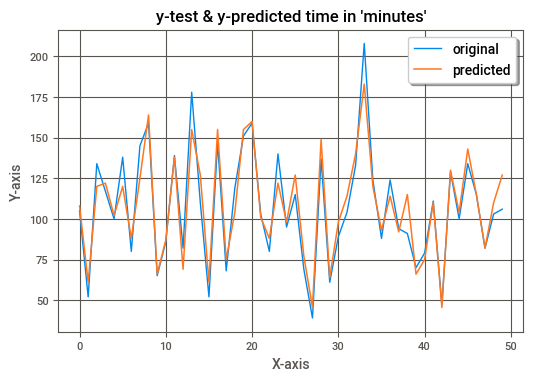

In [38]:
x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], linewidth=1, label="original")
plt.plot(x_ax, y_pred[:50], linewidth=1.1, label="predicted")
plt.title("y-test & y-predicted time in 'minutes'")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## 5. Aplicando Decission Tree Regressor con parámetros seleccionados de Hyper Parameter Tuning

### Pintar el arbol

### Guardar los parámetros de MSE RMSE y Score y mostrarlos en una tablita

DecisionTreeRegressor(ccp_alpha=0.0, criterion='absolute_error', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')
R-squared: 0.8871521778830126
MSE:  198.01398452976133
RMSE:  99.00699226488067
Score: 0.8775422697977959


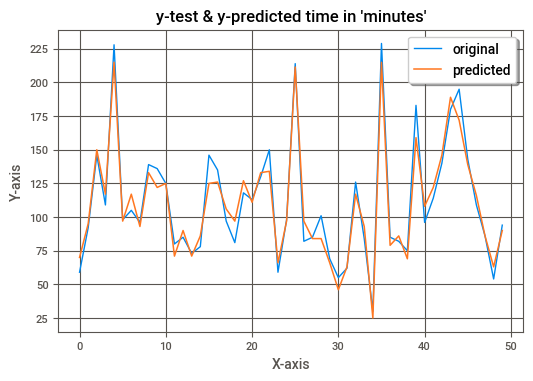

In [39]:
X = df_regression.drop('minutes', axis = 1) 
y = df_regression['minutes']

# Comentaremos este escalado de datos y lo haremos probando el MinMaxScaler, RobustScaler y el StandarScaler
#X = scale(X)
#y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtr = DecisionTreeRegressor(criterion ='absolute_error', 
                      max_depth = 7,
                      max_features = None, 
                      min_weight_fraction_leaf = 0.0,
                      random_state = None, 
                      splitter = 'best') 

print(dtr)
 

dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

score = dtr.score(X_test, y_test)
print(f"Score: {score}") 

x_ax = range(len(y_test[:50]))
plt.plot(x_ax, y_test[:50], linewidth=1, label="original")
plt.plot(x_ax, y_pred[:50], linewidth=1.1, label="predicted")
plt.title("y-test & y-predicted time in 'minutes'")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

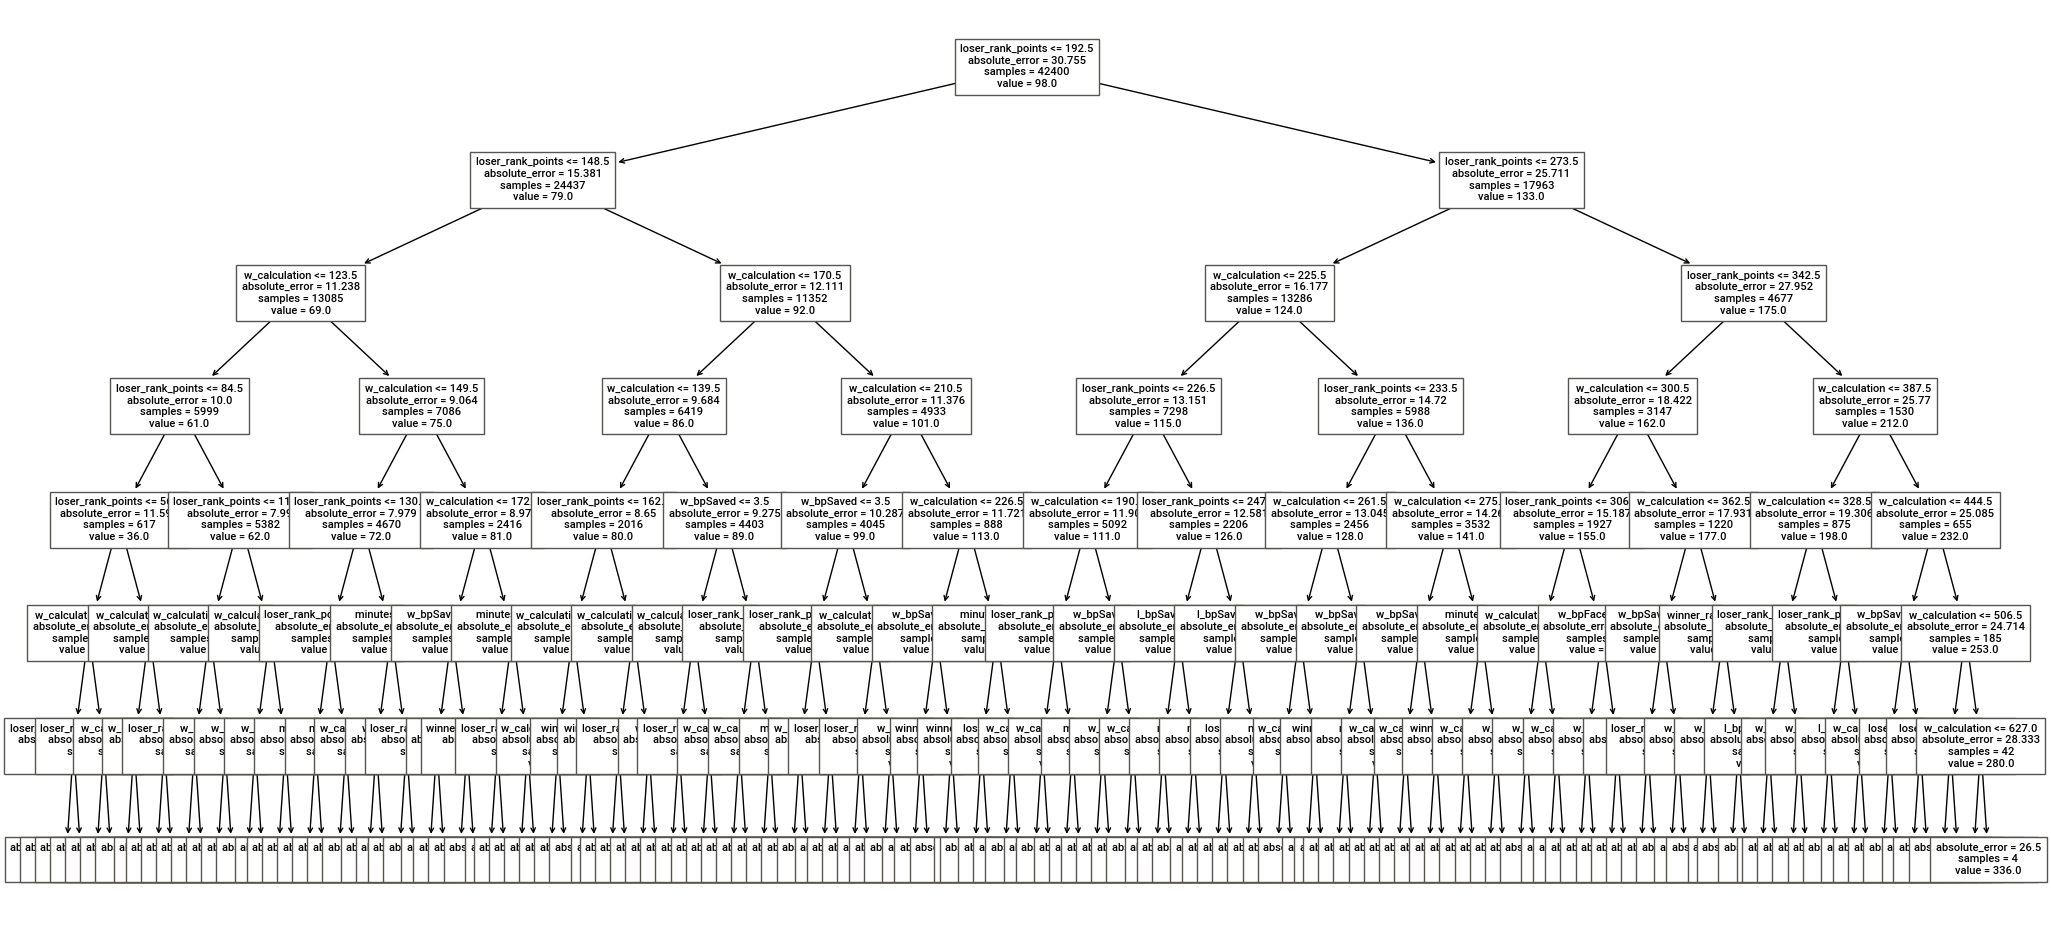

In [44]:
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree_plot = tree.plot_tree(dtr, fontsize=8, feature_names = df_regression.columns)

# Se seleccionan 

## 6. Bibliografía

https://www.mygreatlearning.com/blog/gridsearchcv/

https://www.datatechnotes.com/2020/10/regression-example-with-decisiontreeregressor.html
